In [1]:
"""
Importing libraries
"""
import pandas as pd
import numpy as np

In [2]:
"""
Reading the Csv file
"""
cardio = pd.read_csv("C:\\Users\\Navee\\OneDrive\\Desktop\\cardio_train.csv",sep=";")


In [3]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


As you can see that there are no missing values. Hence we donot need to impute missing values

In [4]:
"""
The age is given in days hence converting it into years by dividing by 365.
"""

cardio['new_age']=round(cardio['age']/365,0)

"""
Dropping the original column of age as it is not needed.
"""
cardio.drop(['age','id'],axis=1,inplace=True)

# What is the age range which are suffering from Heart Disease??

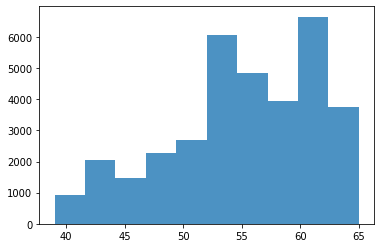

In [6]:
import matplotlib.pyplot as plt
plt.hist(x=cardio[cardio['cardio']==1]['new_age'],alpha=0.8)
plt.show()

We can see from the plot that the people in the age range of 52-62 are more prone to heart disease expect we can see a slight decline in the age range of 56-60

# Who is more susceptible to having a heart disease. Male or Female?

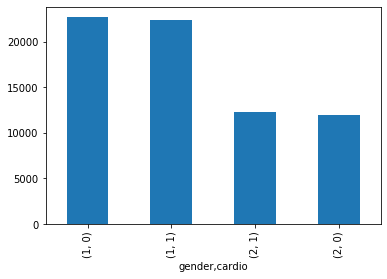

In [7]:
cardio.groupby(['gender'])['cardio'].value_counts().plot(kind='bar')

As we can see from above that males are more susceptible to heart diseases.

# Does smoking have any effect on the Heart Disease??

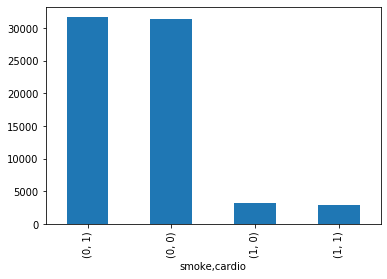

In [117]:
cardio.groupby(['smoke'])['cardio'].value_counts().plot(kind='bar')

Here we can see a different trend that those people who used to smoke are not much susceptible to heart diseases.

In [8]:
X = cardio.drop('cardio',axis=1)
y = cardio['cardio']

### Splitting the dataset into train and test 

In [9]:
from sklearn.model_selection import train_test_split
X_train_org,X_test_org,y_train,y_test = train_test_split(X,y)

### Importing Standard Scaler to normalize the dataset

In [10]:
from sklearn.preprocessing import StandardScaler
StdScaler = StandardScaler()
X_train = StdScaler.fit_transform(X_train_org)

In [11]:
X_test = StdScaler.transform(X_test_org)

### Using Logistic regression to fit the data

In [12]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [13]:
log = logistic.fit(X_train,y_train)

In [14]:
y_pred = log.predict(X_test)

### Finding the accuracy score.

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_test,y_pred)

0.7248643656931779